# Machine Learning Project 

##  M.Khubaib Arif 

## We have a used vehicles dataset. We want to analyze price if we are changing other variables like Kilometres, Passengers, Doors, Highway etc.

In [2]:
# setup
#from mlwpy import *

import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy as stats
%matplotlib inline

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#%reload_ext memory_profiler


In [3]:
vehicles_data=pd.read_csv('Vehicles.csv')

In [4]:
vehicles_data

,Year,Make,Model,Kilometres,Body_Type,Engine,Transmission,Drivetrain,Exterior_Colour,Interior_Colour,Passengers,Doors,Fuel_Type,City,Highway,Price
0,2014,Acura,RDX,290000,SUV,4,Automatic,AWD,Black,Black,5,5,Gas,11.336434,8.668992,11600
1,2014,Acura,RDX,158868,SUV,6,6 Speed Automatic,AWD,Silver,Black,5,5,Gas,10.700000,7.300000,17998
2,2016,Acura,MDX,226214,SUV,6,Automatic,AWD,White,Black,7,5,Gas,12.700000,9.100000,17999
3,2019,Acura,MDX,42081,SUV,6,9 Speed Automatic,AWD,White Diamond Pearl,Black,5,5,Gas,12.200000,9.000000,40588
4,2021,Acura,RDX,66960,SUV,4,10 Speed Automatic,AWD,Majestic Black Pearl,Black,5,5,Gas,11.000000,8.600000,41599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18642,2016,Volvo,XC90,145898,SUV,4,Automatic,AWD,Black,Brown,7,4,Gas,11.500000,9.500000,27998
18643,2015,Volvo,XC60,134000,SUV,4,Automatic,AWD,Black Stone,Black,5,4,Gas,13.000000,9.400000,18995
18644,2017,Volvo,XC90,67596,SUV,4,Automatic,AWD,White,Black,7,4,Gas,11.500000,9.600000,37990
18645,2018,Volvo,S90,74143,Sedan,4,Automatic,AWD,Onyx Black Metallic,Black,5,4,Gas,10.600000,7.600000,37980


In [5]:
vehicles_data=vehicles_data.drop('Year', axis=1)

In [6]:
vehicles_data=vehicles_data.drop('Make', axis=1)

In [7]:
vehicles_data=vehicles_data.drop('Model', axis=1)

In [8]:
vehicles_data=vehicles_data.drop('Body_Type', axis=1)

In [9]:
vehicles_data=vehicles_data.drop('Transmission', axis=1)

In [10]:
vehicles_data=vehicles_data.drop('Drivetrain', axis=1)

In [11]:
vehicles_data=vehicles_data.drop('Exterior_Colour', axis=1)

In [12]:
vehicles_data=vehicles_data.drop('Interior_Colour', axis=1)

In [13]:
vehicles_data=vehicles_data.drop('Fuel_Type', axis=1) 

In [14]:
vehicles_data=vehicles_data.drop('City', axis=1)

In [15]:
vehicles_data=vehicles_data.drop('Engine', axis=1) 

In [16]:
vehicles_data

,Kilometres,Passengers,Doors,Highway,Price
0,290000,5,5,8.668992,11600
1,158868,5,5,7.300000,17998
2,226214,7,5,9.100000,17999
3,42081,5,5,9.000000,40588
4,66960,5,5,8.600000,41599
...,...,...,...,...,...
18642,145898,7,4,9.500000,27998
18643,134000,5,4,9.400000,18995
18644,67596,7,4,9.600000,37990
18645,74143,5,4,7.600000,37980


In [17]:
vehicles_data.duplicated().sum() #Checking and dropping duplicates
vehicles_data=vehicles_data.drop_duplicates(keep='first')
print(vehicles_data.shape)
vehicles_data.reset_index(inplace=True, drop=True)

(14997, 5)


In [18]:
print(vehicles_data.isnull().sum()) #Checking null values

Kilometres    0
Passengers    0
Doors         0
Highway       0
Price         0
dtype: int64


In [19]:
vehicles_data.describe()

,Kilometres,Passengers,Doors,Highway,Price
count,14997.000000,14997.000000,14997.000000,14997.000000,1.499700e+04
mean,70243.149363,5.127159,3.726945,8.328569,4.645263e+04
std,65741.484486,0.948687,0.741037,2.126834,5.496695e+04
min,0.000000,2.000000,2.000000,0.000000,2.000000e+03
25%,9950.000000,5.000000,4.000000,7.100000,2.299900e+04
50%,57684.000000,5.000000,4.000000,8.400000,3.544800e+04
75%,110742.000000,5.000000,4.000000,9.500000,5.688800e+04
max,480000.000000,15.000000,5.000000,42.800000,1.699998e+06


<Axes: >

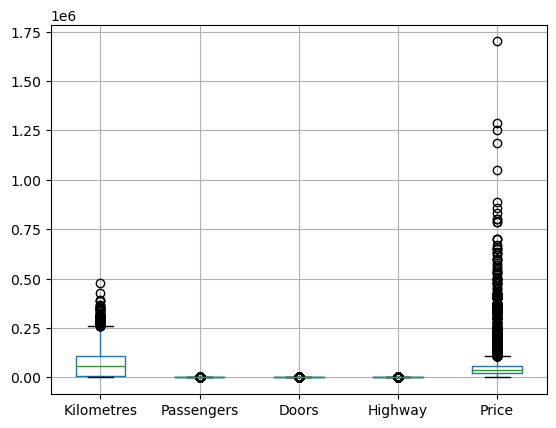

In [20]:
vehicles_data.boxplot()

In [21]:
vehicles_data.shape

(14997, 5)

In [22]:
vehicles_data.columns

Index(['Kilometres', 'Passengers', 'Doors', 'Highway', 'Price'], dtype='object')

In [23]:
ivs=vehicles_data[['Kilometres', 'Passengers', 'Doors', 'Highway']]
scaler= StandardScaler()
scaler.fit(ivs)
ivs_encoded=scaler.transform(ivs)
ivs_encoded= pd.DataFrame(ivs_encoded, columns=['Kilometres', 'Passengers', 'Doors', 'Highway'])
ivs_encoded.head(2)

,Kilometres,Passengers,Doors,Highway
0,3.342854,-0.134041,1.717994,0.160066
1,1.348126,-0.134041,1.717994,-0.483631


In [24]:
dv=np.array(vehicles_data['Price']).reshape(-1,1)
scaler=StandardScaler()
scaler.fit(dv)
dv_encoded=scaler.transform(dv)
dv_encoded= pd.DataFrame(dv_encoded, columns=['Price'])
print(dv_encoded.shape)
dv_encoded.head(2)

(14997, 1)


,Price
0,-0.634086
1,-0.517685


In [25]:
ivs_train, ivs_test, dv_train, dv_test=train_test_split(ivs_encoded, dv_encoded, test_size=0.2) #spliting the data

In [26]:
print('The data shape is ', vehicles_data.shape)
print('The ivs_train shape is', ivs_train.shape)
print('The ivs_test shape is', ivs_test.shape)
print('The dv_train shape is', dv_train.shape)
print('The dv_test shape is', dv_test.shape)

The data shape is  (14997, 5)
The ivs_train shape is (11997, 4)
The ivs_test shape is (3000, 4)
The dv_train shape is (11997, 1)
The dv_test shape is (3000, 1)


## Model Evaluation

In [1]:
MAE_list=[]
MSE_list=[]
RMSE_list=[]
R_Squared_list=[]

def model_evaluation(dv_test, predictions):
    mae=metrics.mean_absolute_error(dv_test, predictions)
    mse=metrics.mean_squared_error(dv_test, predictions)
    rmse=np.sqrt(mse)
    r2=metrics.r2_score(dv_test, predictions)
    MAE_list.append(mae)
    MSE_list.append(mse)
    RMSE_list.append(rmse)
    R_Squared_list.append(r2)
    print("Results of sklearn.metrics: \n")
    print("MAE:",mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("R-Squared:", r2)

## Multiple Linear Regression

In [28]:
regression_model=sm.OLS(dv_train, ivs_train)
results= regression_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.306
Model:                            OLS   Adj. R-squared (uncentered):              0.306
Method:                 Least Squares   F-statistic:                              1323.
Date:                Sat, 18 May 2024   Prob (F-statistic):                        0.00
Time:                        13:19:29   Log-Likelihood:                         -14579.
No. Observations:               11997   AIC:                                  2.917e+04
Df Residuals:                   11993   BIC:                                  2.920e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Kilometres    -0.2873      0.008    -37.373      0.000      -0.302      -0.272
Passengers    -0.1868      0.008    -22.852      0.000      -0.203      -0.171
Doors         -0.1089      0.008    -13.194      0.000      -0.125      -0.093
Highway        0.3015      0.008     38.485      0.000       0.286       0.317
==============================================================================
Omnibus:                    19469.514   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         22383990.427
Skew:                          10.515   Prob(JB):                         0.00
Kurtosis:                     213.563   Cond. No.                         1.65
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
print(results.rsquared)
print(results.rsquared_adj)
print(results.pvalues)

0.30612217061534874
0.3058907430061151
Kilometres    2.813724e-289
Passengers    3.569703e-113
Doors          1.786114e-39
Highway       1.210264e-305
dtype: float64


In [30]:
predictions=results.predict(ivs_test)

In [31]:
model_evaluation(dv_test, predictions)

Results of sklearn.metrics: 

MAE: 0.3745041401176569
MSE: 0.8608022074117744
RMSE: 0.9277942699821844
R-Squared: 0.2607093623766684


## KNN Regression

In [32]:
knn=neighbors.KNeighborsRegressor(n_neighbors=3)
fit=knn.fit(ivs_train, dv_train)
predictions=fit.predict(ivs_test)

In [33]:
model_evaluation(dv_test, predictions)

Results of sklearn.metrics: 

MAE: 0.22371479128566985
MSE: 0.3496764364515004
RMSE: 0.5913344539695793
R-Squared: 0.699684185937012


## Random Forest Regression

In [34]:
rfr=RandomForestRegressor(n_estimators=30,
                         max_features=3, bootstrap=True, max_samples=16)
rfr.fit(ivs_train, dv_train)
predictions=rfr.predict(ivs_test)
model_evaluation(dv_test, predictions)

Results of sklearn.metrics: 

MAE: 0.30411279201750185
MSE: 0.8775147690217561
RMSE: 0.9367575828472146
R-Squared: 0.24635596014026795


C:\Users\Khubab Arif\AppData\Local\Temp\ipykernel_13704\914016960.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(ivs_train, dv_train)


## RMSE of KNN is lowest among all models. This shows that we should go for KNN Regression.